In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd

# Import the project utils
import sys
sys.path.insert(0, '../utilities/')
import mwc_induction_utils as mwc
import sortseq_utils as sortseq
from sequence_logo import *
mwc.set_plotting_style()

# Set font and color palette
path = '/Library/Fonts/Lucida Sans Unicode.ttf'
prop = matplotlib.font_manager.FontProperties(fname=path)
matplotlib.rcParams['font.family'] = prop.get_name()

colors_qual=sns.color_palette(
    ['#bf0087', '#e5b600', '#40ac00', '#5233ea', '#bf3800', '#00acac']) # Colors for non-sequential data
sns.set_palette(colors_qual)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Figure 6

Here we show how changing the context of a binding site may (or may not) alter sequence specificity. We compare two binding site contexts (i.e. the location of a binding site within a promoter) for three different transcription factors. We quantify the changes in sequence specificity using the Pearson's correlation coefficient. 

In [2]:
# Load matrices for all binding sites

# xylR
xylR_left = np.array(pd.read_csv('../../data/models/xylrxylose_0_emat_mean_temp_left.csv')[['A', 'C', 'G', 'T']])
xylR_right = np.array(pd.read_csv('../../data/models/xylrxylose_0_emat_mean_temp_right.csv')[['A', 'C', 'G', 'T']])

# purR
purR = np.array(pd.read_csv('../../data/models/20160710_purT_MG1655_M9glucose_adenine_mut1_4bins_PurR_emat_mean.csv')\
                [['A', 'C', 'G', 'T']])
purR_simple = np.loadtxt('../../data/models/purR.txt').T * -1

# lacI
O1_upstream = np.loadtxt('../../data/models/O1_upstream_energy_matrix', skiprows=1, usecols=(1,2,3,4))
O1_downstream = np.loadtxt('../../data/models/%s%s_fixed_linear_all' % ('O1', '1027'), skiprows=1)

In [3]:
# Fix each matrix so that the lowest energy sequence is fixed at 0

array_list = [xylR_left, purR, O1_upstream, xylR_right, purR_simple, O1_downstream]

for array in array_list:
    minvals = []
    for i, row in enumerate(array):
        minval = min(row)
        for j, val in enumerate(row):
            array[i][j] = val - minval

In [4]:
# Write function for finding pearson's correlation coefficient

def pearsons(X, Y):
    cov = 0
    for i in range(len(X)):
        cov += (X[i] - np.mean(X)) * (Y[i] - np.mean(Y))/len(X)
    return cov/(np.std(X) * np.std(Y))

Text(0.5,0,'sequence position')

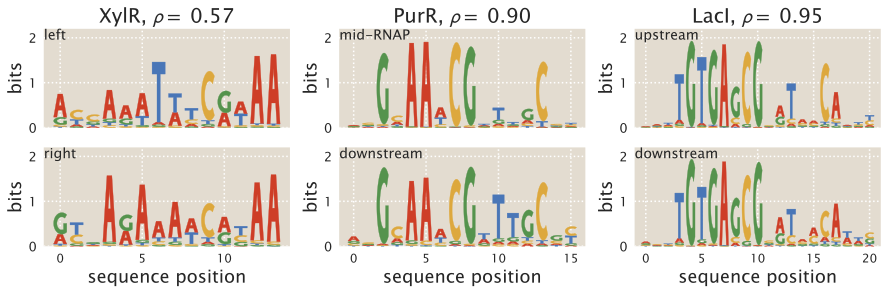

In [6]:
# Scale arrays so that average mutation costs 2.5 kBT and plot sequence logos

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 4))
a = np.ravel(ax)
names_list = ['left', 'mid-RNAP', 'upstream', 'right', 'downstream', 'downstream']
scaled_arrays_list = []

for i, array in enumerate(array_list):
    array_vals = np.array([val for val in array.ravel() if val != 0])
    scaling_factor = 2.5/np.mean(array_vals)
    scaled_array = array * scaling_factor
    scaled_arrays_list.append(scaled_array)
    
    seq_logo(scaled_array, ax=a[i], colors=['#ce3e27', '#dda83d', '#55934d', '#4976b7'])
    a[i].text(0, 2.2, names_list[i], va='top', fontsize=14)
    a[i].set_ylim(0,2.2)
    a[i].set_ylabel('bits')
    a[i].set_xticks([1, 6, 11, 16])
    a[i].set_yticks([0, 1, 2])
    a[i].set_xticklabels(['', '', '', '', ''])

a[0].set_title(r'XylR, $\rho =$ %0.2f' % pearsons(array_list[0].ravel(), array_list[3].ravel()))
a[0].set_xlim(0,15)
a[3].set_xlim(0,15)
a[3].set_xticklabels([0, 5, 10])
a[3].set_xlabel('sequence position')

a[1].set_title(r'PurR, $\rho =$ %0.2f' % pearsons(array_list[1].ravel(), array_list[4].ravel()))
a[1].set_xlim(0,17)
a[4].set_xlim(0,17)
a[4].set_xticklabels([0, 5, 10, 15])
a[4].set_xlabel('sequence position')

a[2].set_title(r'LacI, $\rho =$ %0.2f' % pearsons(array_list[2].ravel(), array_list[5].ravel()))
a[2].set_xlim(0,22)
a[2].set_xticks([1, 6, 11, 16, 21])
a[5].set_xlim(0,22)
a[5].set_xticks([1, 6, 11, 16, 21])
a[5].set_xticklabels([0, 5, 10, 15, 20])
a[5].set_xlabel('sequence position')